In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D
from keras.callbacks import Callback
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [ ]:
df = pd.read_csv('/content/elec-fossil-nuclear-renewables.csv')
df.head()

,Entity,Code,Year,Electricity from renewables - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables),Electricity from nuclear - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables),Electricity from fossil fuels - TWh (adapted for visualization of chart elec-fossil-nuclear-renewables)
0,ASEAN (Ember),NaN,2000,73.25,0.0,305.36
1,ASEAN (Ember),NaN,2001,77.19,0.0,327.66
2,ASEAN (Ember),NaN,2002,76.52,0.0,356.67
3,ASEAN (Ember),NaN,2003,76.40,0.0,381.84
4,ASEAN (Ember),NaN,2004,77.96,0.0,418.60


In [ ]:
df_perbandingan = df.drop(columns='Code')
df_perbandingan = df_perbandingan[df_perbandingan['Entity'] == 'Indonesia']
df_perbandingan.columns = ['Entity', 'Year', 'renewables - TWh', 'nuclear - TWh', 'fossil fuels - TWh']
df_perbandingan.head()

,Entity,Year,renewables - TWh,nuclear - TWh,fossil fuels - TWh
2770,Indonesia,1985,2.766544,0.0,13.602456
2771,Indonesia,1986,4.454755,0.0,13.960245
2772,Indonesia,1987,4.582918,0.0,16.137081
2773,Indonesia,1988,5.033697,0.0,19.773304
2774,Indonesia,1989,6.279967,0.0,22.207033


In [ ]:
df_perbandingan = df_perbandingan[['Year','renewables - TWh']]
df_perbandingan.head()

,Year,renewables - TWh
2770,1985,2.766544
2771,1986,4.454755
2772,1987,4.582918
2773,1988,5.033697
2774,1989,6.279967


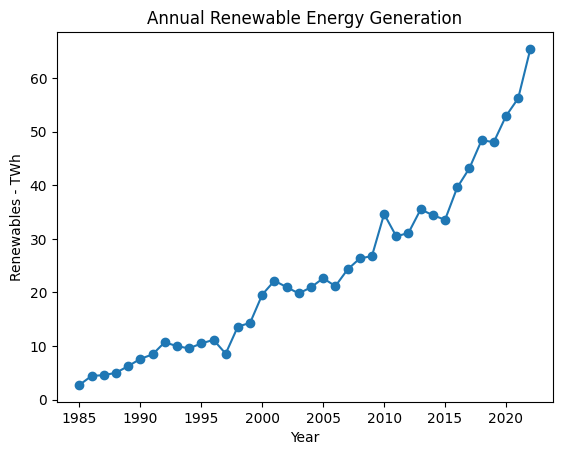

In [ ]:
# Memvisualisasikan data
plt.plot(df_perbandingan['Year'], df_perbandingan['renewables - TWh'], marker='o')
plt.xlabel('Year')
plt.ylabel('Renewables - TWh')
plt.title('Annual Renewable Energy Generation')
plt.show()

In [ ]:
import random
# Setting the seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
# Mengubah data ke dalam bentuk yang dapat digunakan oleh LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_perbandingan['renewables - TWh'].values.reshape(-1, 1))

# Menentukan time step (jumlah tahun sebelumnya yang digunakan untuk memprediksi tahun berikutnya)
time_step = 10

In [ ]:
# Create dataset with consistent time_step
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
# Periksa bentuk data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (22, 10, 1)
X_test shape: (6, 10, 1)
y_train shape: (22,)
y_test shape: (6,)


In [ ]:
# Setting the seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

class PrintMAE(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}, MAE: {logs['mae']:.4f}")

# Fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[PrintMAE()])

Epoch 1/20
22/22 [==============================] - 3s 8ms/step - loss: 0.0818 - mae: 0.1883
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0134 - mae: 0.0910
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0048 - mae: 0.0538
Epoch 4/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0042 - mae: 0.0532
Epoch 5/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0040 - mae: 0.0489
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0038 - mae: 0.0454
Epoch 7/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0062 - mae: 0.0640
Epoch 8/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0055 - mae: 0.0638
Epoch 9/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0029 - mae: 0.0456
Epoch 10/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0050 - mae: 0.0544
Epoch 11/20
22/22 [==============================] - 0s 8ms/step - l

In [ ]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")

Test MAE: 0.0211


In [ ]:
# Predict the next 10 years
predictions = []
last_data = X[-1]  # Mengambil data terakhir dari dataset pelatihan

for _ in range(10):  # Memprediksi 10 tahun ke depan
    next_pred = model.predict(last_data.reshape(1, time_step, 1))
    predictions.append(next_pred[0, 0])
    last_data = np.append(last_data[1:], next_pred)  # Menambahkan prediksi ke dalam data

# Membalikkan skala prediksi ke bentuk aslinya
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Menampilkan hasil prediksi
print(f'Prediksi untuk 10 tahun ke depan: {predictions.flatten()}')

1/1 [==============================] - 0s 27ms/step
Prediksi untuk 10 tahun ke depan: [ 62.04754   67.30736   72.83792   79.64555   87.74197   96.022896
 104.974335 114.32187  124.85059  135.50066 ]


In [ ]:
# Create a DataFrame for the future predictions
future_years = np.arange(df_perbandingan['Year'].max() + 1, df_perbandingan['Year'].max() + 11)
df_future = pd.DataFrame({'Year': future_years, 'Renewables': predictions.flatten()})

# Combine the historical data with the future predictions
df_combined = pd.concat([df_perbandingan, df_future], ignore_index=True)
df_combined

,Year,renewables - TWh,Renewables
0,1985,2.766544,NaN
1,1986,4.454755,NaN
2,1987,4.582918,NaN
3,1988,5.033697,NaN
4,1989,6.279967,NaN
5,1990,7.619860,NaN
6,1991,8.460630,NaN
7,1992,10.731220,NaN
8,1993,9.983049,NaN
9,1994,9.586850,NaN


PREDIKSI PENGGUNAAN ENERGI TERBARUKAN 10 TAHUN KE DEPAN

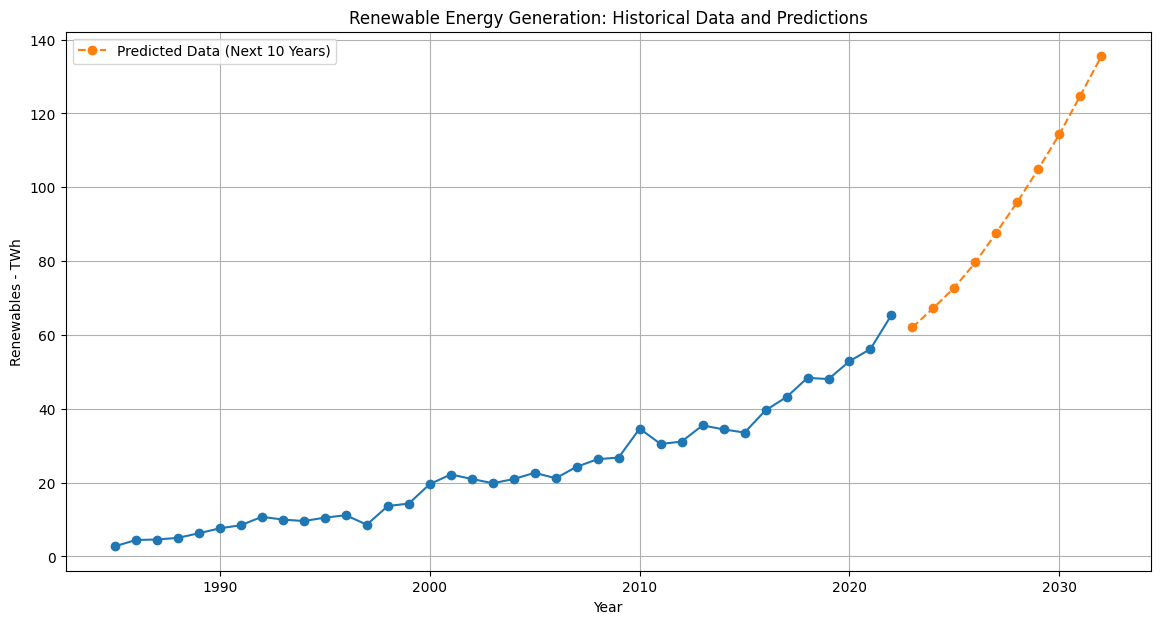

In [ ]:
# Plot data historis dan prediksi
plt.figure(figsize=(14, 7))
plt.plot(df_combined['Year'], df_combined['renewables - TWh'], marker='o')
plt.plot(df_future['Year'], df_future['Renewables'], marker='o', linestyle='--', label='Predicted Data (Next 10 Years)')
plt.xlabel('Year')
plt.ylabel('Renewables - TWh')
plt.title('Renewable Energy Generation: Historical Data and Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung Mean Squared Error (MSE) pada data pelatihan
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
y_true = scaler.inverse_transform(y.reshape(-1, 1))

mse = mean_squared_error(y_true, train_predict)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_true, train_predict)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true, train_predict)
print(f'R-squared: {r2}')


1/1 [==============================] - 0s 25ms/step
Mean Squared Error: 8.1214093146023
Mean Absolute Error: 2.2988839720829555
R-squared: 0.9608400133021564
